In [2]:
#uplode kaggle.json file from local machine from downloads folder
# downl

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
'chmod 600 /root/.kaggle/kaggle.json'

'chmod 600 /root/.kaggle/kaggle.json'

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats --force

100% 1.06G/1.06G [00:48<00:00, 24.6MB/s]
100% 1.06G/1.06G [00:48<00:00, 23.5MB/s]


In [4]:
'chmod 600 /root/.kaggle/kaggle.json'

'chmod 600 /root/.kaggle/kaggle.json'

In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [7]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

#store images in numpy array

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [9]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 78s 106ms/step - loss: 1.7033 - accuracy: 0.5862 - val_loss: 0.6126 - val_accuracy: 0.6712
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5934 - accuracy: 0.6859 - val_loss: 0.5712 - val_accuracy: 0.7046
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5305 - accuracy: 0.7354 - val_loss: 0.5815 - val_accuracy: 0.6862
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4700 - accuracy: 0.7807 - val_loss: 0.4946 - val_accuracy: 0.7672
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4120 - accuracy: 0.8129 - val_loss: 0.4948 - val_accuracy: 0.7522
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3612 - accuracy: 0.8394 - val_loss: 0.4590 - val_accuracy: 0.7896
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3006 - accuracy: 0.8712 - val_loss: 0.8535 - val_ac

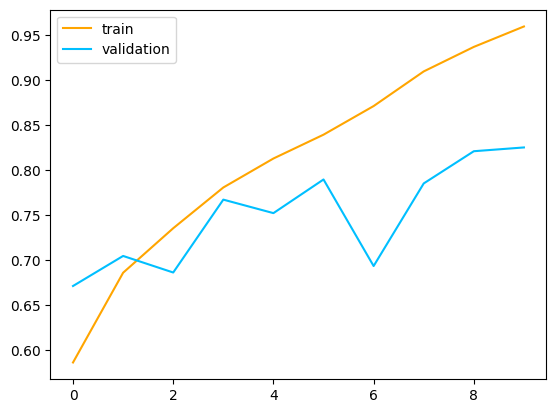

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='orange', label='train')
plt.plot(history.history['val_accuracy'], color ='deepskyblue', label = 'validation')
plt.legend()
plt.show()

# when epoch is  inceasing trning accuracy is improving
# gap showing us its ove fitting

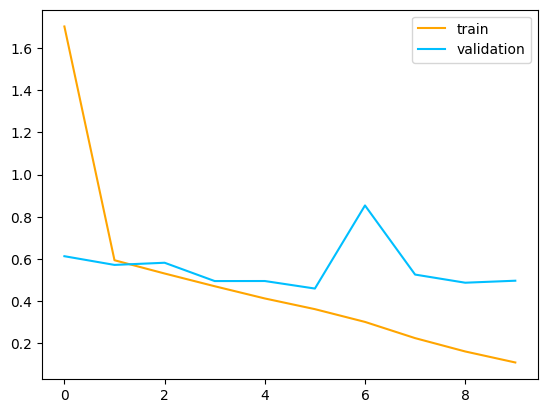

In [14]:
# validation loss
# taining loss
plt.plot(history.history['loss'], color ='orange' , label='train')
plt.plot(history.history['val_loss'], color ='deepskyblue' , label ='validation')
plt.legend()
plt.show()
# epoc isincese trinign loss in reducing but validation loss increasing slowly,
# the gap increassing which is indication better result on trainig data but poor result while testing

In [ ]:
# ways to reduce overfitting
# Add more data
# data aumentation
# L/L2 regulizaztin
# Dropout _______
# Batch Norm ____
# Reduce comlexity
# use some above methods to reduce gaps of overfittign

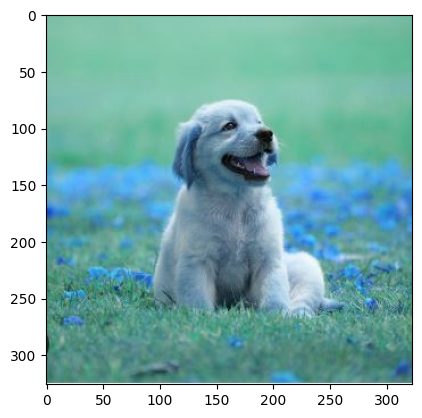

In [16]:
import cv2
test_img = cv2.imread('/content/dog01.JPG')
plt.imshow(test_img)

In [17]:
test_img.shape

(326, 323, 3)

In [18]:
test_img = cv2.resize(test_img,(256,256))

In [19]:
test_input = test_img.reshape((1,256,256,3))

In [20]:
model.predict(test_input)

1/1 [==============================] - 0s 418ms/step


array([[1.]], dtype=float32)

In [ ]:
# test_img = tf.reshape(test_img, (1, 256, 256, 3))

In [ ]:
# model.predict(test_img)

In [ ]:
# result=model.predict(test_input)
# print(result)

# if(result == 0):
#   pred = 'dog'
# else:
#   pred = 'cat'

# print('our model say it is a :' , pred)

## **Confusion Matrix**

In [21]:
!pip install seaborn

1/1 [==============================] - ETA: 0s

<ipython-input-22-dcc9171edd37>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred.append(int(preds > 0.5))


1/1 [==============================] - 0s 26ms/step


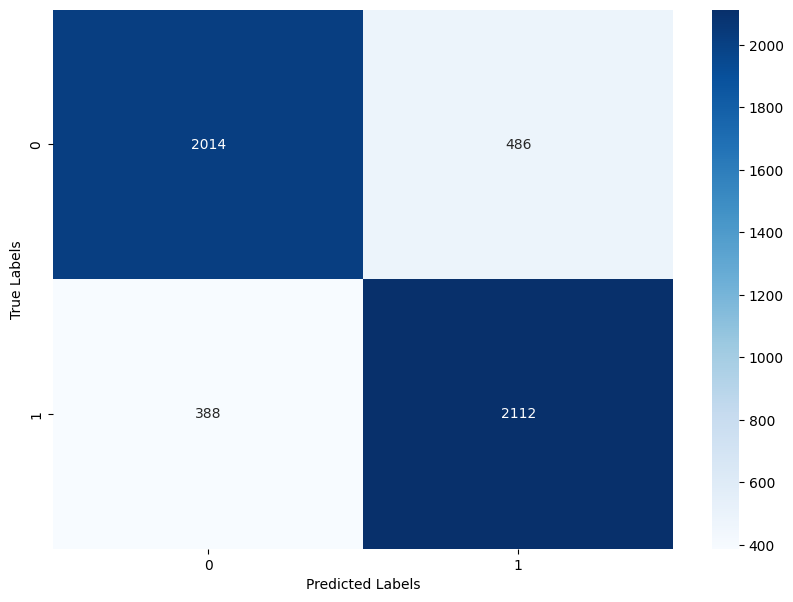

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.math import confusion_matrix

# Make sure the validation dataset is not shuffled
validation_ds = validation_ds.unbatch().batch(1)

# Predict the classes
y_pred = []
y_true = []
for img, label in validation_ds:
    preds = model.predict(img)
    y_pred.append(int(preds > 0.5))
    y_true.append(label.numpy()[0])

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### **Grad-Cam model**

In [23]:
!pip install gradcam

ERROR: Could not find a version that satisfies the requirement gradcam (from versions: none)
ERROR: No matching distribution found for gradcam


In [24]:
!pip install keras


In [25]:
!pip install tensorflow

In [26]:
!pip install tf-keras-vis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 1.4 MB/s eta 0:00:00


In [27]:
import tensorflow as tf
import keras
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize
import matplotlib.pyplot as plt

In [ ]:
print(type(model.output))

<class 'keras.src.engine.keras_tensor.KerasTensor'>


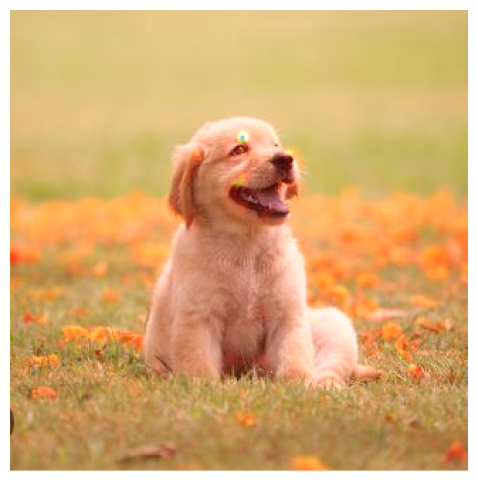

In [32]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from matplotlib import pyplot as plt
import cv2

# Define the function to create the Grad-CAM heatmap
def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    # First, create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with respect to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Assume test_img is loaded in its raw form (e.g., using cv2.imread)
test_img = cv2.imread('/content/dog01.JPG')  # Replace with the actual path of your image
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)  # Convert color channels
test_img_resized = cv2.resize(test_img, (256, 256))  # Resize image
test_img_batch = np.expand_dims(test_img_resized.astype('float32') / 255.0, axis=0)  # Normalize and add batch dimension

# Generate the Grad-CAM heatmap
last_conv_layer_name = 'conv2d_2'  # The name of the last conv layer in your model
heatmap = make_gradcam_heatmap(test_img_batch, model, last_conv_layer_name)

# Resize heatmap to match the size of the original image
heatmap_resized = cv2.resize(heatmap, (test_img.shape[1], test_img.shape[0]))

# Convert heatmap to RGB
heatmap_resized = np.uint8(255 * heatmap_resized)
heatmap_resized = cv2.applyColorMap(heatmap_resized, cv2.COLORMAP_JET)  # Apply color map

# Superimpose the heatmap on the original image
superimposed_img = heatmap_resized * 0.4 + test_img

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(superimposed_img / 255.0)
plt.axis('off')
plt.show()


In [ ]:
for layer in model.layers:
    print(layer.name)

conv2d
batch_normalization
max_pooling2d
conv2d_1
batch_normalization_1
max_pooling2d_1
conv2d_2
batch_normalization_2
max_pooling2d_2
flatten
dense
dropout
dense_1
dropout_1
dense_2
